In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
from numpy.linalg import inv
import numpy as np
import seaborn as sns

In [2]:
# 读取 CSV 文件
df_housing_1014 = pd.read_csv('1014_housing_census.csv')

# 选择需要的列
df_housing_filtered_1014 = df_housing_1014[[
    'Geographic Identifier - FIPS Code',  # FIPS Code
    'Name',                               # 县名
    'State',                              # 州名
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)', 
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error', 
    'Median Home Value (for Owner-Occupied Housing Units)', 
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error'
]]

# 重命名列以便于合并和使用
df_housing_filtered_1014 = df_housing_filtered_1014.rename(columns={
    'Geographic Identifier - FIPS Code': 'FIPSCode',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)': 'Rent',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error': 'RentError',
    'Median Home Value (for Owner-Occupied Housing Units)': 'HomeValue',
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error': 'HomeValueError'
})

# 查看处理后的数据框
df_housing_filtered_1014

,FIPSCode,Name,State,Rent,RentError,HomeValue,HomeValueError
0,15001020100,Census Tract 201,Hawaii,723.0,121.0,283300.0,29089.0
1,15001020202,Census Tract 202.02,Hawaii,815.0,81.0,300000.0,62371.0
2,15001020300,Census Tract 203,Hawaii,664.0,46.0,259800.0,53262.0
3,15001020400,Census Tract 204,Hawaii,727.0,66.0,276400.0,54907.0
4,15001020500,Census Tract 205,Hawaii,642.0,94.0,304500.0,46404.0
...,...,...,...,...,...,...,...
73633,55141010200,Census Tract 102,Wisconsin,607.0,91.0,130400.0,9811.0
73634,55141010400,Census Tract 104,Wisconsin,450.0,128.0,131400.0,5431.0
73635,55141010500,Census Tract 105,Wisconsin,471.0,12.0,144700.0,11343.0
73636,55141010700,Census Tract 107,Wisconsin,498.0,68.0,178400.0,10838.0


In [3]:
# 读取 CSV 文件
df_housing_1822 = pd.read_csv('1822_housing_census.csv')

# 选择需要的列
df_housing_filtered_1822 = df_housing_1822[[
    'Geographic Identifier - FIPS Code',  # FIPS Code
    'Name',                               # 县名
    'State',                              # 州名
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)', 
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error', 
    'Median Home Value (for Owner-Occupied Housing Units)', 
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error'
]]

# 重命名列以便于合并和使用
df_housing_filtered_1822 = df_housing_filtered_1822.rename(columns={
    'Geographic Identifier - FIPS Code': 'FIPSCode',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)': 'Rent',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error': 'RentError',
    'Median Home Value (for Owner-Occupied Housing Units)': 'HomeValue',
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error': 'HomeValueError'
})
df_housing_filtered_1822

,FIPSCode,Name,State,Rent,RentError,HomeValue,HomeValueError
0,15001020100,Census Tract 201,Hawaii,827.0,223.0,494000.0,83680.0
1,15001020202,Census Tract 202.02,Hawaii,1081.0,180.0,494700.0,65947.0
2,15001020300,Census Tract 203,Hawaii,969.0,103.0,357800.0,41337.0
3,15001020400,Census Tract 204,Hawaii,939.0,120.0,284600.0,67492.0
4,15001020500,Census Tract 205,Hawaii,1028.0,72.0,394900.0,56184.0
...,...,...,...,...,...,...,...
85029,9190253200,Census Tract 2532,Connecticut,1236.0,306.0,379900.0,31434.0
85030,9190253400,Census Tract 2534,Connecticut,1721.0,133.0,392900.0,33448.0
85031,9190253500,Census Tract 2535,Connecticut,1188.0,819.0,383100.0,19978.0
85032,9190257100,Census Tract 2571,Connecticut,1692.0,579.0,538400.0,93015.0


In [4]:
df_housing_merged = pd.merge(df_housing_filtered_1014, 
                             df_housing_filtered_1822, 
                             on=['Name', 'State','FIPSCode' ], 
                             #on=['FIPSCode' ], 
                             suffixes=('_1014', '_1822'))
df_housing_merged = df_housing_merged.rename(columns={
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)_1014': 'rent_1014',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error_1014': 'rent_error_1014',
    'Median Home Value (for Owner-Occupied Housing Units)_1014': 'home_value_1014',
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error_1014': 'home_value_error_1014',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent)_1822': 'rent_1822',
    'Median Contract Rent (Contract Rent for Renter-Occupied Housing Units Paying Cash Rent) - Margin of Error_1822': 'rent_error_1822',
    'Median Home Value (for Owner-Occupied Housing Units)_1822': 'home_value_1822',
    'Median Home Value (for Owner-Occupied Housing Units) - Margin of Error_1822': 'home_value_error_1822'
})
df_housing_merged

,FIPSCode,Name,State,Rent_1014,RentError_1014,HomeValue_1014,HomeValueError_1014,Rent_1822,RentError_1822,HomeValue_1822,HomeValueError_1822
0,15001020100,Census Tract 201,Hawaii,723.0,121.0,283300.0,29089.0,827.0,223.0,494000.0,83680.0
1,15001020202,Census Tract 202.02,Hawaii,815.0,81.0,300000.0,62371.0,1081.0,180.0,494700.0,65947.0
2,15001020300,Census Tract 203,Hawaii,664.0,46.0,259800.0,53262.0,969.0,103.0,357800.0,41337.0
3,15001020400,Census Tract 204,Hawaii,727.0,66.0,276400.0,54907.0,939.0,120.0,284600.0,67492.0
4,15001020500,Census Tract 205,Hawaii,642.0,94.0,304500.0,46404.0,1028.0,72.0,394900.0,56184.0
...,...,...,...,...,...,...,...,...,...,...,...
61388,55141010200,Census Tract 102,Wisconsin,607.0,91.0,130400.0,9811.0,841.0,59.0,185100.0,9186.0
61389,55141010400,Census Tract 104,Wisconsin,450.0,128.0,131400.0,5431.0,640.0,83.0,158400.0,12117.0
61390,55141010500,Census Tract 105,Wisconsin,471.0,12.0,144700.0,11343.0,637.0,47.0,195100.0,27526.0
61391,55141010700,Census Tract 107,Wisconsin,498.0,68.0,178400.0,10838.0,889.0,130.0,239400.0,10948.0


In [5]:
# 检查 Name 和 State 组合是否唯一
duplicates = df_housing_merged.duplicated(subset=['FIPSCode'])

# 输出重复的行
if duplicates.any():
    print("存在重复的 Name 和 State 组合:")
    print(df_housing_merged[duplicates])
else:
    print("Name 和 State 的组合是唯一的，没有重复。")


Name 和 State 的组合是唯一的，没有重复。


In [6]:

# 读取 CSV 文件
df_nri = pd.read_csv('NRI_Table_CensusTracts.csv')

# 保留需要的变量
selected_columns = {
    'TRACTFIPS': 'FIPSCode',        # State-County FIPS Code
    'POPULATION': 'Population',
    'BUILDVALUE': 'BuildValue',
    'AGRIVALUE': 'AgriValue',
    'AREA': 'Area',
    'RISK_VALUE': 'RiskValue',
    'RISK_SCORE': 'RiskScore',
    'SOVI_SCORE': 'SoviScore',
    'RESL_SCORE': 'ReslScore',
    'CRF_VALUE': 'CrfValue',
    'EAL_SCORE': 'EalScore',
    'EAL_VALT': 'EalValT'
}

# 选择并重命名列
df_nri_filtered = df_nri[list(selected_columns.keys())].rename(columns=selected_columns)

# 查看筛选和重命名后的数据
df_nri_filtered


,FIPSCode,Population,BuildValue,AgriValue,Area,RiskValue,RiskScore,SoviScore,ReslScore,CrfValue,EalScore,EalValT
0,1001020100,1775,2.915703e+08,42944.0,3.842958,188698.407566,15.783903,23.950001,40.630001,0.926899,19.450642,2.035804e+05
1,1001020200,2055,4.655513e+08,2451.0,1.297330,340553.014519,33.747562,47.160000,40.630001,1.111788,32.112408,3.063111e+05
2,1001020300,3216,5.817038e+08,46581.0,2.089747,330586.742472,32.685630,50.529999,40.630001,1.140902,30.195880,2.897591e+05
3,1001020400,4246,6.366084e+08,76026.0,2.493149,339127.095367,33.598915,28.350000,40.630001,0.963537,37.009418,3.519606e+05
4,1001020501,4322,6.585029e+08,175679.0,2.419425,356499.020920,35.368406,35.139999,40.630001,1.016136,36.896681,3.508379e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
85149,78030960800,3158,1.066439e+09,0.0,4.452584,NaN,NaN,NaN,NaN,NaN,98.044719,4.669136e+06
85150,78030960900,3720,7.915339e+08,0.0,4.344706,NaN,NaN,NaN,NaN,NaN,95.994316,3.358009e+06
85151,78030961000,4385,7.899159e+08,0.0,1.699768,NaN,NaN,NaN,NaN,NaN,97.001902,3.855231e+06
85152,78030961100,3780,8.712647e+08,0.0,1.356900,NaN,NaN,NaN,NaN,NaN,96.444090,3.557580e+06


In [7]:
df_merged = pd.merge(df_nri_filtered, df_housing_merged, on='FIPSCode', how='inner')
pd.set_option('display.max_columns', None)
df_merged['RentDifference'] = df_merged['Rent_1822'] - df_merged['Rent_1014']
df_merged['HomeValueDifference'] = (df_merged['HomeValue_1822'] - df_merged['HomeValue_1014']) / df_merged['HomeValue_1014'] * 100
df_merged 

,FIPSCode,Population,BuildValue,AgriValue,Area,RiskValue,RiskScore,SoviScore,ReslScore,CrfValue,EalScore,EalValT,Name,State,Rent_1014,RentError_1014,HomeValue_1014,HomeValueError_1014,Rent_1822,RentError_1822,HomeValue_1822,HomeValueError_1822,RentDifference,HomeValueDifference
0,1001020100,1775,291570314.0,42944.0,3.842958,188698.407566,15.783903,23.950001,40.630001,0.926899,19.450642,2.035804e+05,Census Tract 201,Alabama,475.0,218.0,132400.0,33788.0,492.0,148.0,162000.0,27866.0,17.0,22.356495
1,1001020200,2055,465551259.0,2451.0,1.297330,340553.014519,33.747562,47.160000,40.630001,1.111788,32.112408,3.063111e+05,Census Tract 202,Alabama,534.0,55.0,110300.0,11960.0,543.0,115.0,128200.0,23622.0,9.0,16.228468
2,1001020300,3216,581703828.0,46581.0,2.089747,330586.742472,32.685630,50.529999,40.630001,1.140902,30.195880,2.897591e+05,Census Tract 203,Alabama,584.0,115.0,109400.0,9439.0,639.0,70.0,137400.0,7095.0,55.0,25.594150
3,1001020400,4246,636608405.0,76026.0,2.493149,339127.095367,33.598915,28.350000,40.630001,0.963537,37.009418,3.519606e+05,Census Tract 204,Alabama,823.0,111.0,132700.0,10285.0,721.0,152.0,171200.0,27320.0,-102.0,29.012811
4,1001020600,3729,602064603.0,43981.0,3.159542,412327.837288,40.656662,45.160000,40.630001,1.094337,39.663433,3.767832e+05,Census Tract 206,Alabama,556.0,132.0,138800.0,34093.0,603.0,597.0,204500.0,100774.0,47.0,47.334294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61386,72153750501,3968,289261555.0,0.0,0.709872,NaN,NaN,91.518402,NaN,NaN,90.112032,2.039375e+06,Census Tract 7505.01,Puerto Rico,305.0,251.0,97400.0,3474.0,362.0,75.0,107700.0,4777.0,57.0,10.574949
61387,72153750502,1845,159325134.0,0.0,0.269073,NaN,NaN,93.407951,NaN,NaN,77.128497,1.096242e+06,Census Tract 7505.02,Puerto Rico,99.0,NaN,139900.0,13824.0,99.0,NaN,147400.0,14235.0,0.0,5.360972
61388,72153750503,2155,203837691.0,0.0,1.287150,NaN,NaN,88.220009,NaN,NaN,82.723066,1.378399e+06,Census Tract 7505.03,Puerto Rico,339.0,116.0,105300.0,9023.0,528.0,24.0,108300.0,7284.0,189.0,2.849003
61389,72153750601,4368,343618529.0,0.0,4.285956,NaN,NaN,79.961548,NaN,NaN,92.402001,2.396245e+06,Census Tract 7506.01,Puerto Rico,620.0,147.0,105500.0,7456.0,589.0,177.0,118500.0,13156.0,-31.0,12.322275


In [8]:
# 计算 HomeValueDifference 大于 0 和小于 0 的数量
positive_count = (df_merged['HomeValueDifference'] > 0).sum()
negative_count = (df_merged['HomeValueDifference'] < 0).sum()

print(f"HomeValueDifference > 0 的数量: {positive_count}")
print(f"HomeValueDifference < 0 的数量: {negative_count}")


HomeValueDifference > 0 的数量: 57600
HomeValueDifference < 0 的数量: 1992


In [9]:
# 删除 df_merged 中包含缺失值的行
df_merged_cleaned = df_merged.dropna()

df_merged_cleaned

,FIPSCode,Population,BuildValue,AgriValue,Area,RiskValue,RiskScore,SoviScore,ReslScore,CrfValue,EalScore,EalValT,Name,State,Rent_1014,RentError_1014,HomeValue_1014,HomeValueError_1014,Rent_1822,RentError_1822,HomeValue_1822,HomeValueError_1822,RentDifference,HomeValueDifference
0,1001020100,1775,2.915703e+08,42944.0,3.842958,1.886984e+05,15.783903,23.950001,40.630001,0.926899,19.450642,2.035804e+05,Census Tract 201,Alabama,475.0,218.0,132400.0,33788.0,492.0,148.0,162000.0,27866.0,17.0,22.356495
1,1001020200,2055,4.655513e+08,2451.0,1.297330,3.405530e+05,33.747562,47.160000,40.630001,1.111788,32.112408,3.063111e+05,Census Tract 202,Alabama,534.0,55.0,110300.0,11960.0,543.0,115.0,128200.0,23622.0,9.0,16.228468
2,1001020300,3216,5.817038e+08,46581.0,2.089747,3.305867e+05,32.685630,50.529999,40.630001,1.140902,30.195880,2.897591e+05,Census Tract 203,Alabama,584.0,115.0,109400.0,9439.0,639.0,70.0,137400.0,7095.0,55.0,25.594150
3,1001020400,4246,6.366084e+08,76026.0,2.493149,3.391271e+05,33.598915,28.350000,40.630001,0.963537,37.009418,3.519606e+05,Census Tract 204,Alabama,823.0,111.0,132700.0,10285.0,721.0,152.0,171200.0,27320.0,-102.0,29.012811
4,1001020600,3729,6.020646e+08,43981.0,3.159542,4.123278e+05,40.656662,45.160000,40.630001,1.094337,39.663433,3.767832e+05,Census Tract 206,Alabama,556.0,132.0,138800.0,34093.0,603.0,597.0,204500.0,100774.0,47.0,47.334294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60544,56043000200,3116,9.244558e+08,48188304.0,2258.279014,3.399390e+05,33.685725,45.730000,50.259998,1.093491,32.629119,3.108750e+05,Census Tract 2,Wyoming,605.0,344.0,230400.0,41302.0,607.0,57.0,235900.0,26193.0,2.0,2.387153
60545,56043000301,2339,5.582305e+08,0.0,0.777348,1.093518e+05,6.362080,48.790001,50.259998,1.119148,5.757804,9.770980e+04,Census Tract 3.01,Wyoming,490.0,101.0,107400.0,8300.0,800.0,202.0,148600.0,13540.0,310.0,38.361266
60546,56043000302,2207,6.072659e+08,1152712.0,6.285299,1.719055e+05,13.715930,52.990002,50.259998,1.156068,12.177936,1.486984e+05,Census Tract 3.02,Wyoming,409.0,71.0,166900.0,13451.0,582.0,22.0,194500.0,10106.0,173.0,16.536848
60547,56045951100,3324,8.967953e+08,38352053.0,2380.966410,1.380442e+06,79.213243,61.610001,4.540000,1.291461,76.419193,1.068900e+06,Census Tract 9511,Wyoming,449.0,194.0,193400.0,34816.0,531.0,168.0,218600.0,35512.0,82.0,13.029990


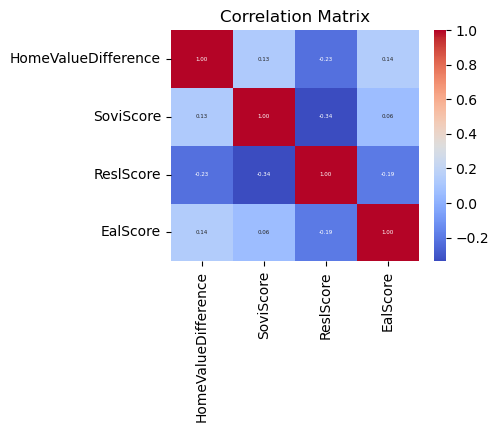

In [10]:
#Calculate the correlation matrix
correlation_matrix = df_merged_cleaned[['HomeValueDifference', 'SoviScore', 'ReslScore', 'EalScore']].corr()

# Plot a heatmap
plt.figure(figsize=(4, 3))  # Adjust the figure size to make it smaller
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 4} )
plt.title("Correlation Matrix")
plt.show()

/var/folders/mw/njy11qrs0wnfc4y6yh155qk80000gn/T/ipykernel_7390/2304347766.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df_merged_cleaned.groupby(pd.cut(df_merged_cleaned[feature], bins))['HomeValueDifference'].mean()


<Figure size 640x480 with 0 Axes>

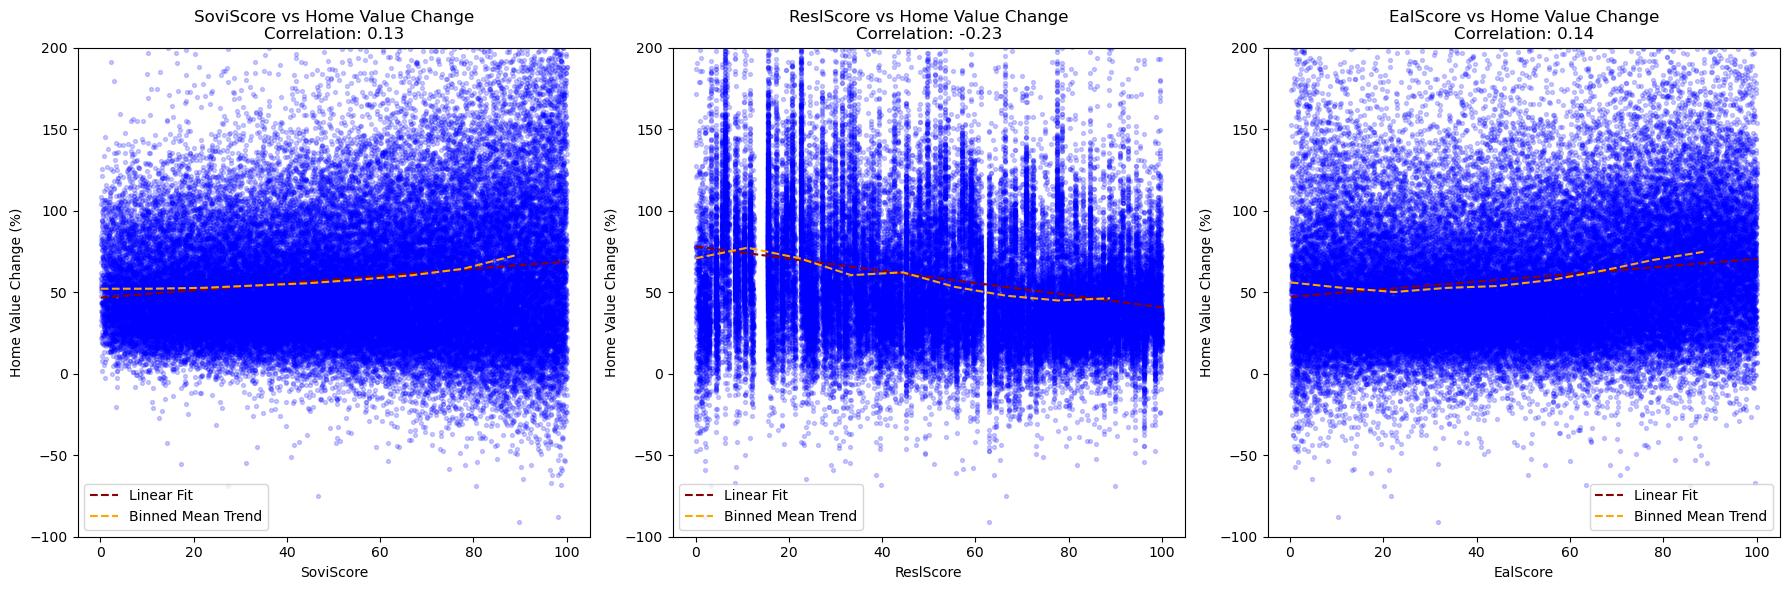

In [11]:
from numpy.polynomial.polynomial import Polynomial
features=['SoviScore', 'ReslScore', 'EalScore']
plt.figure()
rows = 1  # 只有一行
cols = len(features)  # 列数等于特征数量
fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6))
fig.subplots_adjust(wspace=0.4)  # 调整图之间的水平间距

for i, feature in enumerate(features):
    # 每列对应一个特征
    axes[i].scatter(df_merged_cleaned[feature], df_merged_cleaned['HomeValueDifference'], alpha=0.2, s=8, color='blue')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Home Value Change (%)")
    axes[i].set_ylim(-100, 200)  # 限制 y 轴范围

    # 添加线性拟合
    poly = Polynomial.fit(df_merged_cleaned[feature], df_merged_cleaned['HomeValueDifference'], deg=1)
    x_range = np.linspace(df_merged_cleaned[feature].min(), df_merged_cleaned[feature].max(), 100)
    axes[i].plot(x_range, poly(x_range), color='darkred', linestyle='--', label="Linear Fit")

    # 添加分箱趋势线
    bins = np.linspace(df_merged_cleaned[feature].min(), df_merged_cleaned[feature].max(), 10)
    bin_means = df_merged_cleaned.groupby(pd.cut(df_merged_cleaned[feature], bins))['HomeValueDifference'].mean()
    axes[i].plot(bins[:-1], bin_means, color='orange', linestyle='--', label="Binned Mean Trend")

    # 添加相关系数
    corr = np.corrcoef(df_merged_cleaned[feature], df_merged_cleaned['HomeValueDifference'])[0, 1]
    axes[i].set_title(f"{feature} vs Home Value Change\nCorrelation: {corr:.2f}")

    # 添加图例
    axes[i].legend()

plt.tight_layout()
plt.show()

## 系数 by state

In [13]:
!pip install statsmodels

In [14]:
import pandas as pd
import statsmodels.api as sm

# 假设 df_merged_cleaned 已经加载
# df_merged_cleaned = pd.read_csv('your_data.csv')  # 替换为实际数据加载方式

# 初始化字典，用于存储每个州的系数
state_coefficients = []

# 遍历每个州的数据进行回归
for state, group in df_merged_cleaned.groupby('State'):
    y = group['HomeValueDifference']  # 因变量
    X = group[['SoviScore', 'ReslScore', 'EalScore']]  # 自变量
    X = sm.add_constant(X)  # 添加截距项
    
    if len(group) > 3:  # 确保组内数据点足够多
        try:
            model = sm.OLS(y, X).fit()  # 拟合回归模型
            # 提取三个系数
            coefficients = {
                'State': state,
                'State_Size': len(group),
                'SoviScore_Coefficient': model.params.get('SoviScore', None),
                'ReslScore_Coefficient': model.params.get('ReslScore', None),
                'EalScore_Coefficient': model.params.get('EalScore', None),
                
            }
            state_coefficients.append(coefficients)
        except Exception as e:
            print(f"Error in state {state}: {e}")

# 将结果存储为 DataFrame
coefficients_df = pd.DataFrame(state_coefficients)

# 保存到 CSV 文件（可选）
#coefficients_df.to_csv('state_coefficients.csv', index=False)

# 打印结果
coefficients_df


,State,State_Size,SoviScore_Coefficient,ReslScore_Coefficient,EalScore_Coefficient
0,Alabama,858,-0.243650,-0.182369,-0.012556
1,Alaska,138,-0.044261,0.132560,0.126891
2,Arizona,1186,0.661113,2.571192,-0.446313
3,Arkansas,529,-0.118691,-0.196381,-0.106172
4,California,5794,0.609499,0.401144,-0.131782
5,Colorado,969,0.511576,1.051072,0.135802
6,Delaware,158,-0.159600,-0.440196,0.022577
7,District of Columbia,129,0.535935,0.684250,-0.442771
8,Florida,3028,0.465756,-0.372914,-0.061807
9,Georgia,1148,-0.018211,0.137176,-0.523430


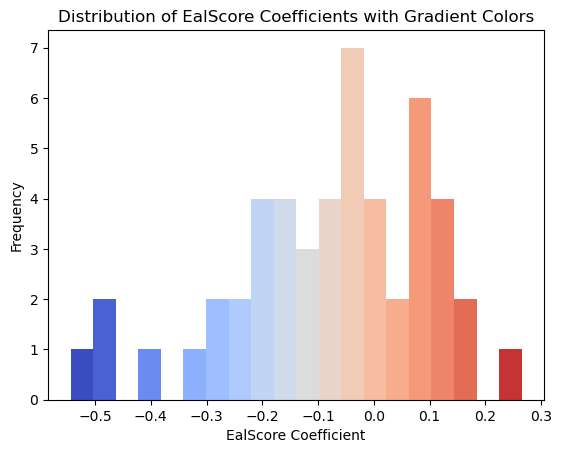

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 假设 coefficients_df 是您的数据框
data = coefficients_df['EalScore_Coefficient']

# 计算直方图的频数和边界
counts, bins = np.histogram(data, bins=20)

# 创建一个颜色映射，从蓝色到红色
cmap = plt.get_cmap('coolwarm')

# 计算每个柱子的颜色，基于 data（而不是 counts）
norm = plt.Normalize(data.min(), data.max())
colors = cmap(norm(bins[:-1]))  # 使用 bins[:-1] 以应用颜色到每个 bin

# 创建柱状图，逐个设置颜色
fig, ax = plt.subplots()
for i in range(len(counts)):
    ax.bar(bins[i], counts[i], width=bins[i+1]-bins[i], color=colors[i])

# 添加标题和标签
plt.title('Distribution of EalScore Coefficients with Gradient Colors')
plt.xlabel('EalScore Coefficient')
plt.ylabel('Frequency')

# 显示图形
plt.show()



In [16]:
coefficients_df.describe

<bound method NDFrame.describe of                    State  State_Size  SoviScore_Coefficient  \
0                Alabama         858              -0.243650   
1                 Alaska         138              -0.044261   
2                Arizona        1186               0.661113   
3               Arkansas         529              -0.118691   
4             California        5794               0.609499   
5               Colorado         969               0.511576   
6               Delaware         158              -0.159600   
7   District of Columbia         129               0.535935   
8                Florida        3028               0.465756   
9                Georgia        1148              -0.018211   
10                Hawaii         144              -0.050427   
11                 Idaho         189               0.112939   
12              Illinois        2779              -0.002827   
13               Indiana        1253              -0.131718   
14                  I

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
# 加载美国州边界数据（需要安装 GeoPandas）
shapefile_path = "state/tl_2024_us_state.shp"
us_states = gpd.read_file(shapefile_path)
# 合并地理数据和回归系数
us_states = us_states.merge(coefficients_df, left_on='NAME', right_on='State', how='left')


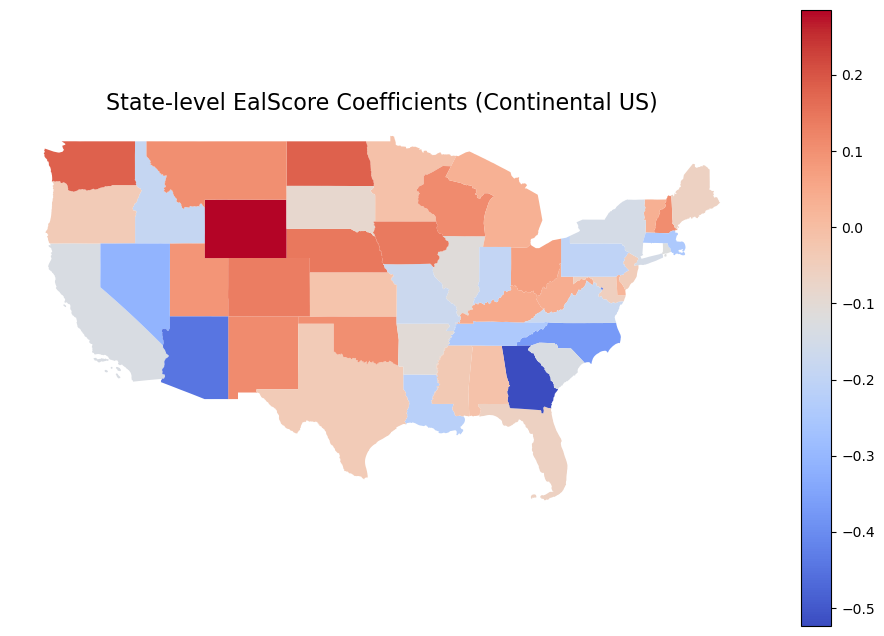

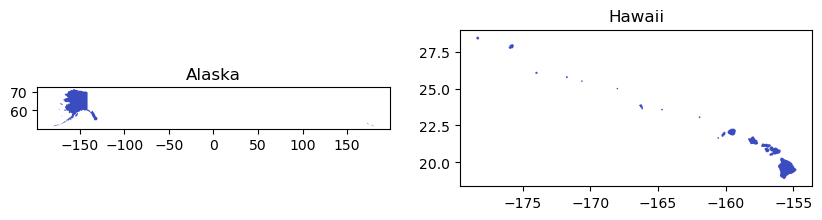

In [18]:
from shapely.geometry import box
continental_us = box(-125, 24, -66, 50)
us_states_continental = us_states[us_states.intersects(continental_us)]

# 创建主图和小图
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
us_states_continental.plot(column='EalScore_Coefficient', cmap='coolwarm', legend=True, ax=ax)
plt.title('State-level EalScore Coefficients (Continental US)', fontsize=16)
plt.axis('off')

# 小图：显示阿拉斯加和夏威夷
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
us_states[us_states['NAME'] == 'Alaska'].plot(column='EalScore_Coefficient', cmap='coolwarm', ax=axs[0])
axs[0].set_title('Alaska')
us_states[us_states['NAME'] == 'Hawaii'].plot(column='EalScore_Coefficient', cmap='coolwarm', ax=axs[1])
axs[1].set_title('Hawaii')
plt.show()

## 线性回归

In [20]:
import statsmodels.api as sm

# 定义因变量
y = df_merged_cleaned ['HomeValueDifference']

# 定义自变量
X = df_merged_cleaned [['RiskValue', 'SoviScore', 'ReslScore', 'CrfValue', 'EalScore', 
               'Population', 'BuildValue', 'AgriValue']]

# 添加常数项（截距项）
X = sm.add_constant(X)

# 创建并拟合回归模型
model = sm.OLS(y, X).fit()

# 输出回归结果
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     HomeValueDifference   R-squared:                       0.078
Model:                             OLS   Adj. R-squared:                  0.078
Method:                  Least Squares   F-statistic:                     582.0
Date:                 Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                         16:41:30   Log-Likelihood:            -2.8769e+05
No. Observations:                54951   AIC:                         5.754e+05
Df Residuals:                    54942   BIC:                         5.755e+05
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9615      2.902     11.70

In [21]:
import statsmodels.api as sm

# 定义因变量
y = df_merged_cleaned ['HomeValueDifference']

# 定义自变量
X = df_merged_cleaned [[ 'SoviScore', 'ReslScore', 'EalScore']]

# 添加常数项（截距项）
X = sm.add_constant(X)

# 创建并拟合回归模型
model_1 = sm.OLS(y, X).fit()

# 输出回归结果
print(model_1.summary())

                             OLS Regression Results                            
Dep. Variable:     HomeValueDifference   R-squared:                       0.065
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     1264.
Date:                 Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                         16:41:30   Log-Likelihood:            -2.8809e+05
No. Observations:                54951   AIC:                         5.762e+05
Df Residuals:                    54947   BIC:                         5.762e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.8460      0.785     77.50

Mean Squared Error: 1889.053317960259
R-squared: 0.18286338889482212


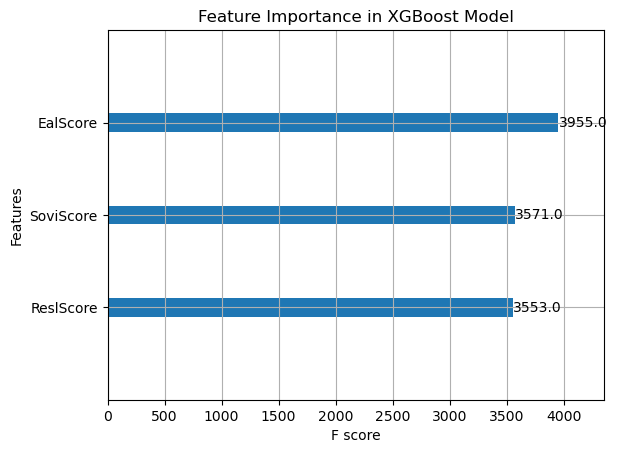

In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 定义因变量和自变量
y = df_merged_cleaned['HomeValueDifference']
X = df_merged_cleaned[['SoviScore', 'ReslScore', 'EalScore']]

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义XGBoost回归模型
#xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# 定义XGBoost回归模型，设置超参数
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 损失函数
    max_depth=6,                  # 决策树最大深度，控制模型复杂度
    learning_rate=0.1,            # 学习率，减小步长提高稳定性
    n_estimators=200,             # 弱学习器的数量（迭代次数）
    subsample=0.8,                # 每棵树随机采样的比例，避免过拟合
    colsample_bytree=0.8,         # 每棵树使用的特征采样比例
    random_state=42               # 保持结果一致性
)

# 训练模型
xgb_model.fit(X_train, y_train)

# 在测试集上预测
y_pred = xgb_model.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 特征重要性
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model)
plt.title("Feature Importance in XGBoost Model")
plt.show()


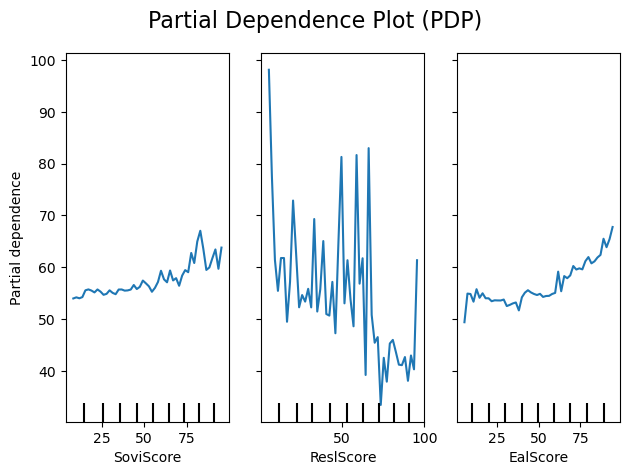

In [28]:
from sklearn.inspection import PartialDependenceDisplay

# 绘制部分依赖图
features = ['SoviScore', 'ReslScore', 'EalScore']  # 特征名称
PartialDependenceDisplay.from_estimator(
    xgb_model,         # 已训练的模型
    X_train,           # 训练数据
    features,          # 要分析的特征
    grid_resolution=50 # 网格分辨率（越高图越平滑）
)

plt.suptitle("Partial Dependence Plot (PDP)", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/mw/njy11qrs0wnfc4y6yh155qk80000gn/T/ipykernel_7390/2893522786.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cleaned['EalScore_Binned'] = pd.cut(df_merged_cleaned['EalScore'], bins=bins, labels=labels)
/var/folders/mw/njy11qrs0wnfc4y6yh155qk80000gn/T/ipykernel_7390/2893522786.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = df_merged_cleaned.groupby('EalScore_Binned')['HomeValueDifference'].mean()


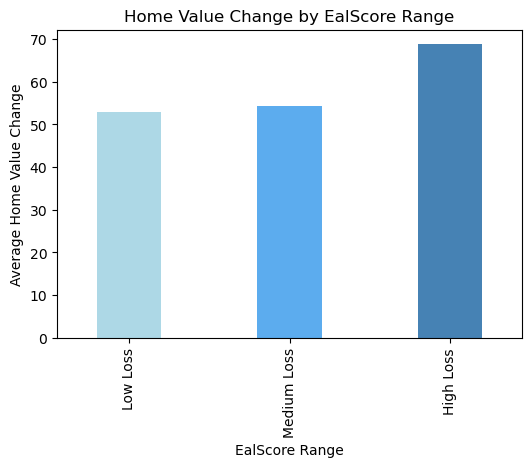

In [32]:
# Assuming 'df_merged_cleaned' is your DataFrame containing the relevant data
y = df_merged_cleaned['HomeValueDifference']
X = df_merged_cleaned[['SoviScore', 'ReslScore', 'EalScore']]

# Define bins
bins = [
    df_merged_cleaned['EalScore'].min(),
    df_merged_cleaned['EalScore'].quantile(0.33),
    df_merged_cleaned['EalScore'].quantile(0.67),
    df_merged_cleaned['EalScore'].max()
]
labels = ['Low Loss', 'Medium Loss', 'High Loss']

# Add a binned column to the DataFrame
df_merged_cleaned['EalScore_Binned'] = pd.cut(df_merged_cleaned['EalScore'], bins=bins, labels=labels)

# Calculate the mean HomeValueDifference for each bin
binned_avg = df_merged_cleaned.groupby('EalScore_Binned')['HomeValueDifference'].mean()

# Visualize the results
binned_avg.plot(
    kind='bar',
    #color=['#ADD8E6', '#87CEEB', '#B0E0E6'],
    color=['#ADD8E6', '#5CACEE', '#4682B4'],
    width=0.4,  # 调整条形宽度，默认是1.0，设置为0.6较细
    figsize=(6, 4)  # 调整图表大小，宽度10，高度4
)

plt.title("Home Value Change by EalScore Range")
plt.xlabel("EalScore Range")
plt.ylabel("Average Home Value Change")
plt.show()


In [34]:
# 按州分组计算 EalScore 的平均值
state_avg_eal = df_merged_cleaned.groupby('State')['EalScore'].mean()

# 排序，提取前 5 个州
top_5_states = state_avg_eal.sort_values(ascending=False).head(5)

print("Top 5 States with the Highest Average EalScore:")
print(top_5_states)


Top 5 States with the Highest Average EalScore:
State
South Dakota    81.049176
Florida         80.904060
North Dakota    75.582442
Oregon          74.387068
California      72.219457
Name: EalScore, dtype: float64
